# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Rayhan Kurniawan
- **Email:** kurniawanrayhan3@gmail.com
- **ID Dicoding:** rayhankurniawan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren kualitas udara berubah sepanjang waktu?
- Pertanyaan 2: Bagaimana hubungan SO2	NO2	CO	O3	TEMP	PRES	DEWP	WSPM dalam mempengarusi tingkat polusi (AQI)?

## Import Semua Packages/Library yang Digunakan

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

## Data Wrangling

### Gathering Data

In [35]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
file_names = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Membaca setiap file dan menyimpannya dalam list
dataframes = [pd.read_csv("/content/drive/MyDrive/Data Science/Air-quality-dataset/" + file) for file in file_names]

# Menggabungkan semua DataFrame menjadi satu
df = pd.concat(dataframes, ignore_index=True)

# Menampilkan informasi dari DataFrame yang digabungkan
print(df.head())
print(df.shape)

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
(420768, 18)


### Assessing Data

In [37]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [39]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [40]:
# Mengidentifikasi data duplikasi
duplicate_rows = df[df.duplicated()]
print('Jumlah data duplikat =', len(duplicate_rows))

Jumlah data duplikat = 0


In [41]:
# Melihat jumlah nilai unik
for column in df:
    jumlah_nilai_unik = df[column].nunique()
    print(f"Jumlah nilai unik pada {column}: {jumlah_nilai_unik}")

Jumlah nilai unik pada No: 35064
Jumlah nilai unik pada year: 5
Jumlah nilai unik pada month: 12
Jumlah nilai unik pada day: 31
Jumlah nilai unik pada hour: 24
Jumlah nilai unik pada PM2.5: 888
Jumlah nilai unik pada PM10: 1084
Jumlah nilai unik pada SO2: 691
Jumlah nilai unik pada NO2: 1212
Jumlah nilai unik pada CO: 132
Jumlah nilai unik pada O3: 1598
Jumlah nilai unik pada TEMP: 2034
Jumlah nilai unik pada PRES: 726
Jumlah nilai unik pada DEWP: 645
Jumlah nilai unik pada RAIN: 253
Jumlah nilai unik pada wd: 16
Jumlah nilai unik pada WSPM: 117
Jumlah nilai unik pada station: 12


In [42]:
# Menampilkan nilai unik dalam kolom tertentu
unique_values = df['wd'].unique()
print(unique_values)

['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]


### Cleaning Data

In [43]:
#diganti ke nilai modus
modus = df["RAIN"].mode()[0]
df["RAIN"].fillna(modus, inplace=True)

modus = df['WSPM'].mode()[0]
df['WSPM'].fillna(modus, inplace=True)

In [44]:
kolom_diganti = ['PM10', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP']

# Menghitung nilai rata-rata
mean_values = df[kolom_diganti].mean()

# Mengganti nilai-nilai yang hilang
df[kolom_diganti] = df[kolom_diganti].fillna(mean_values)


In [45]:
kolom_diganti = ['PM2.5', 'SO2', 'O3']

# Menghitung nilai tengah
median_values = df[kolom_diganti].median()

# Mengganti nilai-nilai yang hilang dengan nilai tengah
df[kolom_diganti] = df[kolom_diganti].fillna(median_values)


In [46]:
df= df.drop(columns=['wd'])

In [47]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64

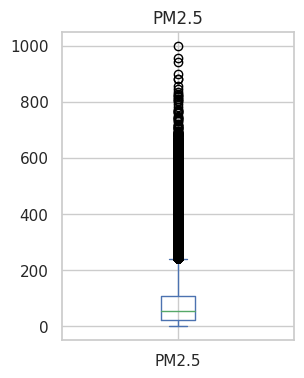

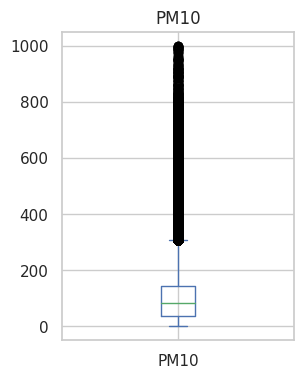

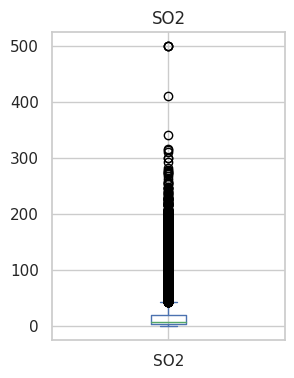

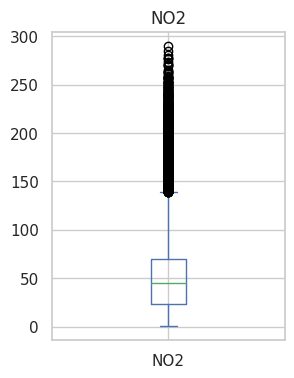

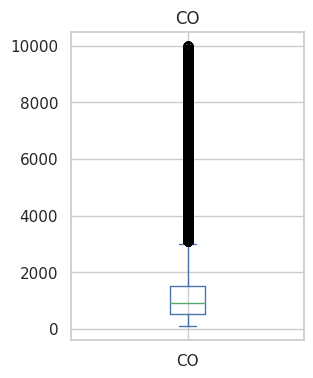

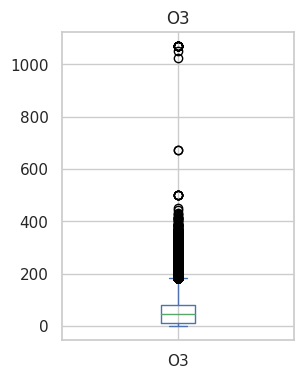

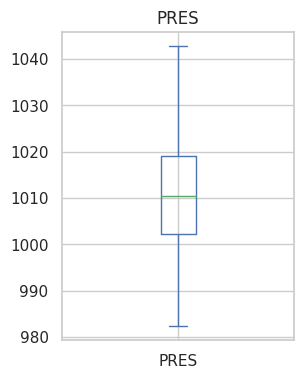

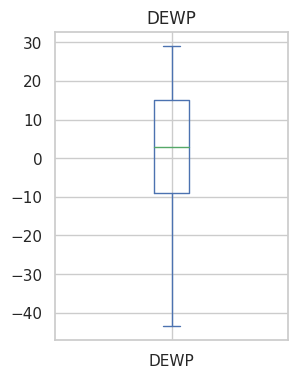

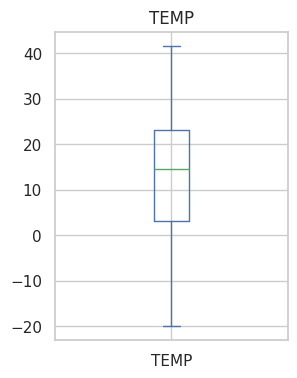

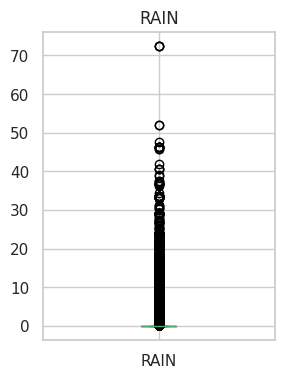

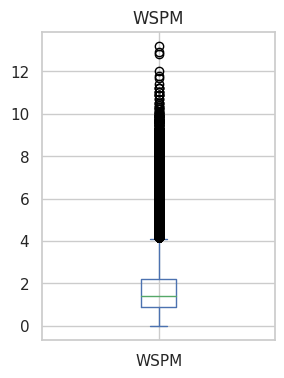

In [48]:
kolom_kuantitatif= ['PM2.5','PM10','SO2','NO2','CO','O3','PRES','DEWP','TEMP','RAIN','WSPM']
for column in df[kolom_kuantitatif]:
    df[column].plot(kind='box', figsize=(3, 4))
    plt.title(column)
    plt.show()

In [49]:
# Kolom-kolom yang ingin dihapus pencilannya
kolom_kuantitatif = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Fungsi untuk menghapus pencilan berdasarkan IQR
def hapus_pencilan_iqr(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    df_tanpa_pencilan = df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]
    return df_tanpa_pencilan

# Menghapus pencilan dari setiap kolom kuantitatif
for kolom in kolom_kuantitatif:
    df = hapus_pencilan_iqr(df, kolom)

In [50]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,321689.000000,321689.000000,321689.00000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000,321689.000000
mean,17940.437463,2014.700192,6.62852,15.806733,11.234609,52.633678,74.648563,8.696114,41.285028,837.396217,55.518812,14.484025,1010.349873,2.914243,0.076224,1.810346
std,10047.372883,1.178178,3.25280,8.791312,6.952465,46.551773,55.802696,8.567067,25.449585,493.931454,42.612485,10.890482,10.572282,14.317572,0.875610,1.298460
min,1.000000,2013.000000,1.00000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,9764.000000,2014.000000,4.00000,8.000000,5.000000,16.000000,28.000000,2.000000,20.000000,400.000000,21.000000,5.200000,1001.800000,-9.600000,0.000000,0.900000
50%,18469.000000,2015.000000,7.00000,16.000000,11.000000,39.000000,62.000000,5.000000,38.000000,700.000000,48.000000,16.300000,1009.500000,4.700000,0.000000,1.500000
75%,26849.000000,2016.000000,9.00000,23.000000,17.000000,75.000000,107.000000,12.000000,57.000000,1200.000000,80.000000,23.500000,1018.700000,15.900000,0.000000,2.300000
max,35064.000000,2017.000000,12.00000,31.000000,23.000000,241.000000,279.000000,39.412800,118.047500,2300.000000,183.000000,41.600000,1042.800000,29.100000,72.500000,12.000000


In [51]:
df.shape

(321689, 17)

## Exploratory Data Analysis (EDA)

### Explore data dan transformasi

In [52]:
# Menghitung Matriks Korelasi
df.corr()

<ipython-input-52-75870c1ef0d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.973033,-0.005369,0.027048,0.009941,-0.066238,-0.085480,-0.187371,-0.062174,-0.046852,-0.042734,-0.132557,0.200169,-0.112870,0.008649,0.068350
year,0.973033,1.000000,-0.234979,0.010414,0.010009,-0.072298,-0.078731,-0.142176,-0.078492,-0.071831,-0.002389,-0.161429,0.198991,-0.173613,0.004516,0.102432
month,-0.005369,-0.234979,1.000000,-0.019576,-0.004330,0.032465,-0.022115,-0.176058,0.074560,0.111789,-0.167566,0.143547,-0.024694,0.278196,0.017505,-0.154010
day,0.027048,0.010414,-0.019576,1.000000,-0.002398,0.026795,0.043341,0.012543,0.042390,0.022848,-0.022032,0.002565,0.034606,0.017592,-0.004572,-0.032018
hour,0.009941,0.010009,-0.004330,-0.002398,1.000000,-0.027450,0.038426,0.035155,-0.025321,-0.042655,0.294364,0.110008,0.000067,-0.057715,0.013048,0.153082
PM2.5,-0.066238,-0.072298,0.032465,0.026795,-0.027450,1.000000,0.819377,0.302978,0.477110,0.695530,-0.052033,0.153992,-0.190733,0.365024,0.007388,-0.281374
PM10,-0.085480,-0.078731,-0.022115,0.043341,0.038426,0.819377,1.000000,0.327511,0.517574,0.578188,-0.019312,0.159928,-0.201756,0.265458,-0.016784,-0.178220
SO2,-0.187371,-0.142176,-0.176058,0.012543,0.035155,0.302978,0.327511,1.000000,0.364690,0.408927,-0.100617,-0.268288,0.218378,-0.260803,-0.049396,-0.042076
NO2,-0.062174,-0.078492,0.074560,0.042390,-0.025321,0.477110,0.517574,0.364690,1.000000,0.586856,-0.474825,-0.067996,0.043642,0.139685,-0.038629,-0.395480
CO,-0.046852,-0.071831,0.111789,0.022848,-0.042655,0.695530,0.578188,0.408927,0.586856,1.000000,-0.292506,-0.068465,0.009108,0.211436,0.017710,-0.347341


In [53]:
#menggabungkan 'hour' dan 'day' menjadi satu kolom tanggal
df['tanggal'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# hapus kolom
df.drop(['year', 'month', 'day', 'hour', 'RAIN'], axis=1, inplace=True)

df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,station,tanggal
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,2.0,Aotizhongxin,2013-03-01 04:00:00


In [54]:
df.head(20)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,station,tanggal
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,2.0,Aotizhongxin,2013-03-01 04:00:00
5,6,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,3.7,Aotizhongxin,2013-03-01 05:00:00
6,7,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,2.5,Aotizhongxin,2013-03-01 06:00:00
7,8,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,3.8,Aotizhongxin,2013-03-01 07:00:00
8,9,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,4.1,Aotizhongxin,2013-03-01 08:00:00
9,10,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,2.6,Aotizhongxin,2013-03-01 09:00:00


In [55]:
kolom_rata = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']

# Mengelompokkan data berdasarkan tanggal (tanpa jam) dan menghitung rata-rata
data_harian = df.groupby(df['tanggal'].dt.date)[kolom_rata].mean().reset_index()

data_harian.head()

,tanggal,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
0,2013-03-01,7.285211,12.764807,8.718310,25.891189,422.128869,68.028169,1.187676,1026.577817,-20.152113,2.910563
1,2013-03-02,17.898936,23.455333,20.095745,47.724430,736.808861,38.079787,-0.038830,1028.244149,-16.913830,1.229787
2,2013-03-03,50.034483,82.025862,19.456897,52.388868,959.713504,39.318966,7.180172,1012.509483,-12.363793,1.565517
3,2013-03-04,19.407692,36.096943,15.516474,39.131740,644.436665,59.203846,9.820000,1017.359231,-12.942692,2.222692
4,2013-03-05,77.666667,90.622222,18.177778,47.287017,1164.139986,90.044444,1.646667,1012.202222,-9.451111,0.822222


In [56]:
data_harian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tanggal  1456 non-null   object 
 1   PM2.5    1456 non-null   float64
 2   PM10     1456 non-null   float64
 3   SO2      1456 non-null   float64
 4   NO2      1456 non-null   float64
 5   CO       1456 non-null   float64
 6   O3       1456 non-null   float64
 7   TEMP     1456 non-null   float64
 8   PRES     1456 non-null   float64
 9   DEWP     1456 non-null   float64
 10  WSPM     1456 non-null   float64
dtypes: float64(10), object(1)
memory usage: 125.2+ KB


In [57]:
data_harian.head(20)

,tanggal,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
0,2013-03-01,7.285211,12.764807,8.718310,25.891189,422.128869,68.028169,1.187676,1026.577817,-20.152113,2.910563
1,2013-03-02,17.898936,23.455333,20.095745,47.724430,736.808861,38.079787,-0.038830,1028.244149,-16.913830,1.229787
2,2013-03-03,50.034483,82.025862,19.456897,52.388868,959.713504,39.318966,7.180172,1012.509483,-12.363793,1.565517
3,2013-03-04,19.407692,36.096943,15.516474,39.131740,644.436665,59.203846,9.820000,1017.359231,-12.942692,2.222692
4,2013-03-05,77.666667,90.622222,18.177778,47.287017,1164.139986,90.044444,1.646667,1012.202222,-9.451111,0.822222
5,2013-03-06,145.555556,141.666667,29.777778,62.222222,1644.444444,87.333333,0.944444,1005.288889,-6.177778,1.144444
6,2013-03-07,99.200000,100.266667,25.600000,54.709239,1268.651097,56.666667,5.180000,1002.400000,-4.046667,1.113333
7,2013-03-08,99.730159,133.320718,30.963517,64.228101,1226.734911,89.000000,9.763492,998.553968,-2.725397,1.888889
8,2013-03-09,37.798561,104.670918,8.578596,27.236981,618.620599,88.928058,6.050360,1010.570504,-15.387770,3.644604
9,2013-03-10,33.186312,57.724824,18.285171,43.488159,741.290862,85.669202,5.735741,1020.264639,-14.690875,2.295817


In [58]:
data_harian.corr()

<ipython-input-58-962ad5d45405>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_harian.corr()


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
PM2.5,1.000000,0.890118,0.340400,0.614607,0.791478,-0.087274,0.051011,-0.149514,0.294556,-0.492389
PM10,0.890118,1.000000,0.366255,0.629225,0.657889,-0.003422,0.098706,-0.205735,0.235215,-0.367185
SO2,0.340400,0.366255,1.000000,0.540462,0.521132,-0.334208,-0.517511,0.336292,-0.440815,-0.191167
NO2,0.614607,0.629225,0.540462,1.000000,0.725710,-0.440318,-0.141168,0.058061,0.061304,-0.640380
CO,0.791478,0.657889,0.521132,0.725710,1.000000,-0.431637,-0.227056,0.090421,0.089833,-0.592493
O3,-0.087274,-0.003422,-0.334208,-0.440318,-0.431637,1.000000,0.656531,-0.579464,0.447896,0.189007
TEMP,0.051011,0.098706,-0.517511,-0.141168,-0.227056,0.656531,1.000000,-0.864097,0.896345,-0.238833
PRES,-0.149514,-0.205735,0.336292,0.058061,0.090421,-0.579464,-0.864097,1.000000,-0.793631,0.222397
DEWP,0.294556,0.235215,-0.440815,0.061304,0.089833,0.447896,0.896345,-0.793631,1.000000,-0.494852
WSPM,-0.492389,-0.367185,-0.191167,-0.640380,-0.592493,0.189007,-0.238833,0.222397,-0.494852,1.000000


In [59]:
def calculate_aqi(value, breakpoints):
    """
    Generic function to calculate AQI for a pollutant.
    """
    for bp in breakpoints:
        if value >= bp['low_conc'] and value <= bp['high_conc']:
            aqi = ((bp['high_aqi'] - bp['low_aqi']) / (bp['high_conc'] - bp['low_conc'])) * (value - bp['low_conc']) + bp['low_aqi']
            return round(aqi)
    return 0

# AQI breakpoints for each pollutant based on a common standard
aqi_breakpoints = {
    'PM2.5': [
        {'low_conc': 0, 'high_conc': 12, 'low_aqi': 0, 'high_aqi': 50},
        {'low_conc': 12.1, 'high_conc': 35.4, 'low_aqi': 51, 'high_aqi': 100},
        {'low_conc': 35.5, 'high_conc': 55.4, 'low_aqi': 101, 'high_aqi': 150},
        {'low_conc': 55.5, 'high_conc': 150.4, 'low_aqi': 151, 'high_aqi': 200},
        {'low_conc': 150.5, 'high_conc': 250.4, 'low_aqi': 201, 'high_aqi': 300},
        {'low_conc': 250.5, 'high_conc': 500.4, 'low_aqi': 301, 'high_aqi': 500}
    ],
    'PM10': [
        {'low_conc': 0, 'high_conc': 54, 'low_aqi': 0, 'high_aqi': 50},
        {'low_conc': 55, 'high_conc': 154, 'low_aqi': 51, 'high_aqi': 100},
        {'low_conc': 155, 'high_conc': 254, 'low_aqi': 101, 'high_aqi': 150},
        {'low_conc': 255, 'high_conc': 354, 'low_aqi': 151, 'high_aqi': 200},
        {'low_conc': 355, 'high_conc': 424, 'low_aqi': 201, 'high_aqi': 300},
        {'low_conc': 425, 'high_conc': 604, 'low_aqi': 301, 'high_aqi': 500}
    ],
}

# Calculate AQI for PM2.5 and PM10
data_harian['AQI_PM2.5'] = data_harian['PM2.5'].apply(lambda x: calculate_aqi(x, aqi_breakpoints['PM2.5']))
data_harian['AQI_PM10'] = data_harian['PM10'].apply(lambda x: calculate_aqi(x, aqi_breakpoints['PM10']))

# Determine overall AQI (maximum of AQI values)
data_harian['AQI'] = data_harian[['AQI_PM2.5', 'AQI_PM10']].max(axis=1)

# Define function to categorize AQI
def aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Apply the categorization function
data_harian['Kategori_Udara'] = data_harian['AQI'].apply(aqi_category)

# Display the updated data_harianframe with AQI and AQI category
data_harian[['tanggal', 'PM2.5', 'PM10', 'AQI_PM2.5', 'AQI_PM10', 'AQI', 'Kategori_Udara']].head()


,tanggal,PM2.5,PM10,AQI_PM2.5,AQI_PM10,AQI,Kategori_Udara
0,2013-03-01,7.285211,12.764807,30,12,30,Good
1,2013-03-02,17.898936,23.455333,63,22,63,Moderate
2,2013-03-03,50.034483,82.025862,137,64,137,Unhealthy for Sensitive Groups
3,2013-03-04,19.407692,36.096943,66,33,66,Moderate
4,2013-03-05,77.666667,90.622222,162,69,162,Unhealthy


In [60]:
data_harian.head()

,tanggal,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,AQI_PM2.5,AQI_PM10,AQI,Kategori_Udara
0,2013-03-01,7.285211,12.764807,8.718310,25.891189,422.128869,68.028169,1.187676,1026.577817,-20.152113,2.910563,30,12,30,Good
1,2013-03-02,17.898936,23.455333,20.095745,47.724430,736.808861,38.079787,-0.038830,1028.244149,-16.913830,1.229787,63,22,63,Moderate
2,2013-03-03,50.034483,82.025862,19.456897,52.388868,959.713504,39.318966,7.180172,1012.509483,-12.363793,1.565517,137,64,137,Unhealthy for Sensitive Groups
3,2013-03-04,19.407692,36.096943,15.516474,39.131740,644.436665,59.203846,9.820000,1017.359231,-12.942692,2.222692,66,33,66,Moderate
4,2013-03-05,77.666667,90.622222,18.177778,47.287017,1164.139986,90.044444,1.646667,1012.202222,-9.451111,0.822222,162,69,162,Unhealthy


In [61]:
#membuang kolom
hapus_kolom = ['AQI_PM2.5',	'AQI_PM10']
datapilih= data_harian.drop(columns= hapus_kolom)

#melihat 5 baris dari datapilih
datapilih.head()


,tanggal,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,AQI,Kategori_Udara
0,2013-03-01,7.285211,12.764807,8.718310,25.891189,422.128869,68.028169,1.187676,1026.577817,-20.152113,2.910563,30,Good
1,2013-03-02,17.898936,23.455333,20.095745,47.724430,736.808861,38.079787,-0.038830,1028.244149,-16.913830,1.229787,63,Moderate
2,2013-03-03,50.034483,82.025862,19.456897,52.388868,959.713504,39.318966,7.180172,1012.509483,-12.363793,1.565517,137,Unhealthy for Sensitive Groups
3,2013-03-04,19.407692,36.096943,15.516474,39.131740,644.436665,59.203846,9.820000,1017.359231,-12.942692,2.222692,66,Moderate
4,2013-03-05,77.666667,90.622222,18.177778,47.287017,1164.139986,90.044444,1.646667,1012.202222,-9.451111,0.822222,162,Unhealthy


## Visualization & Explanatory Analysis

### Pertanyaan 1:

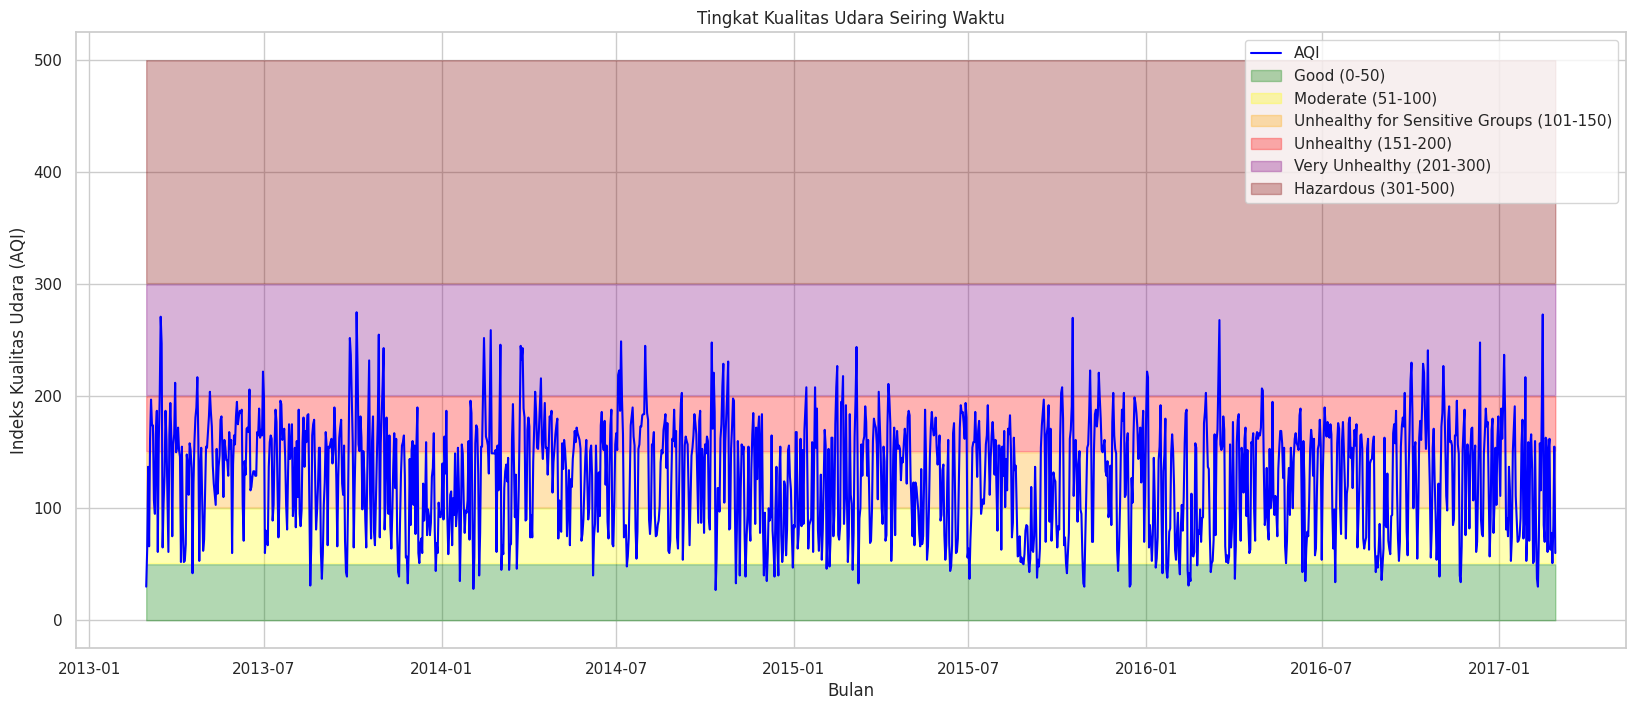

In [62]:
sns.set(style="whitegrid")

# Create a plot for AQI over time
plt.figure(figsize=(20, 8))
plt.plot(datapilih['tanggal'], datapilih['AQI'], label='AQI', color='blue')

# Highlighting the different AQI categories
plt.fill_between(datapilih['tanggal'], 0, 50, color='green', alpha=0.3, label='Good (0-50)')
plt.fill_between(datapilih['tanggal'], 51, 100, color='yellow', alpha=0.3, label='Moderate (51-100)')
plt.fill_between(datapilih['tanggal'], 101, 150, color='orange', alpha=0.3, label='Unhealthy for Sensitive Groups (101-150)')
plt.fill_between(datapilih['tanggal'], 151, 200, color='red', alpha=0.3, label='Unhealthy (151-200)')
plt.fill_between(datapilih['tanggal'], 201, 300, color='purple', alpha=0.3, label='Very Unhealthy (201-300)')
plt.fill_between(datapilih['tanggal'], 301, 500, color='maroon', alpha=0.3, label='Hazardous (301-500)')

# Adding labels and title
plt.xlabel('Bulan')
plt.ylabel('Indeks Kualitas Udara (AQI)')
plt.title('Tingkat Kualitas Udara Seiring Waktu')
plt.legend()

# Show the plot
plt.show()


### Pertanyaan 2:

In [63]:
datapilih.corr()

<ipython-input-63-e3afbf5dd8ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datapilih.corr()


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,AQI
PM2.5,1.000000,0.890118,0.340400,0.614607,0.791478,-0.087274,0.051011,-0.149514,0.294556,-0.492389,0.934583
PM10,0.890118,1.000000,0.366255,0.629225,0.657889,-0.003422,0.098706,-0.205735,0.235215,-0.367185,0.869025
SO2,0.340400,0.366255,1.000000,0.540462,0.521132,-0.334208,-0.517511,0.336292,-0.440815,-0.191167,0.377899
NO2,0.614607,0.629225,0.540462,1.000000,0.725710,-0.440318,-0.141168,0.058061,0.061304,-0.640380,0.685846
CO,0.791478,0.657889,0.521132,0.725710,1.000000,-0.431637,-0.227056,0.090421,0.089833,-0.592493,0.811677
O3,-0.087274,-0.003422,-0.334208,-0.440318,-0.431637,1.000000,0.656531,-0.579464,0.447896,0.189007,-0.081088
TEMP,0.051011,0.098706,-0.517511,-0.141168,-0.227056,0.656531,1.000000,-0.864097,0.896345,-0.238833,0.092332
PRES,-0.149514,-0.205735,0.336292,0.058061,0.090421,-0.579464,-0.864097,1.000000,-0.793631,0.222397,-0.187546
DEWP,0.294556,0.235215,-0.440815,0.061304,0.089833,0.447896,0.896345,-0.793631,1.000000,-0.494852,0.339557
WSPM,-0.492389,-0.367185,-0.191167,-0.640380,-0.592493,0.189007,-0.238833,0.222397,-0.494852,1.000000,-0.562708


<ipython-input-64-f4d29af05595>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datapilih.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

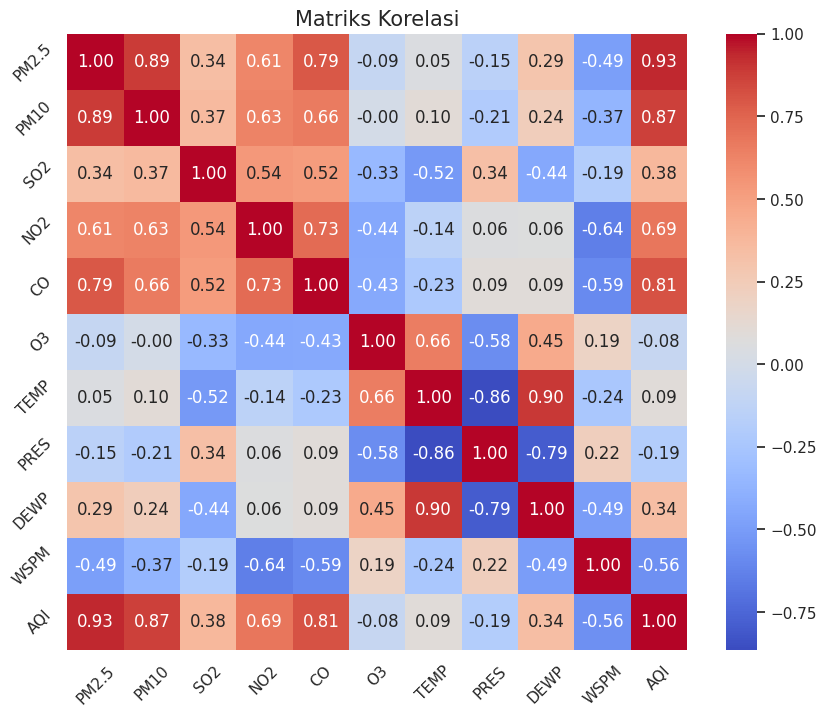

In [64]:
correlation_matrix = datapilih.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,
cmap='coolwarm',fmt=".2f")
plt.title('Matriks Korelasi', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show

## Conclusion

- Conclution pertanyaan 1: Sepanjang tren kualitas udara, dapat dilihat rata-rata kualitas udara di kota beijing adalah Unhealthy for Sensitive Groups dengan index AQI 101-150
- Conclution pertanyaan 2: Pada gambar matriks korelasi, kita bisa melihat hubungan SO2, NO2, CO, DEWP, WSPM yang erat dalam mempengarusi tingkat polusi (PM2.5, PM10 dan AQI).